In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import multivariate_normal
#from pymer4.models import Lmer

In [2]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
import rpy2

In [3]:
import sys
#!{sys.executable} -m pip install pymer4

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(nlme)
library(lme4)
library(MASS)
library(ggplot2)

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lme4’


R[write to console]: The following object is masked from ‘package:nlme’:

    lmList




<br>

<h3>Important</h3>

In mixed-effects models, the fixed effects represent the overall average effects across all groups, while the random effects capture deviations from these average effects for specific groups

[R in Python](https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook)

<br>

In [59]:
%%R
#install.packages('ggplot2')

NULL


In [5]:
%%R
library(ggplot2)

<h3>Task 1</h3>

In [7]:
oats = pd.read_csv('/Users/herrakaava/Documents/school/sekamallit/week_4/oats.csv', index_col=0)

In [8]:
oats.head()

,Block,Variety,nitro,yield
1,I,Victory,0.0,111
2,I,Victory,0.2,130
3,I,Victory,0.4,157
4,I,Victory,0.6,174
5,I,Golden Rain,0.0,117


In [9]:
oats.shape

(72, 4)

In [10]:
list(oats['Block'].unique())

['I', 'II', 'III', 'IV', 'V', 'VI']

In [11]:
oats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1 to 72
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Block    72 non-null     object 
 1   Variety  72 non-null     object 
 2   nitro    72 non-null     float64
 3   yield    72 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ KB


In [12]:
oats.isna().any().any()

False

In [13]:
oats.rename(columns={'yield': 'Yield'}, inplace=True)

In [14]:
oats.columns.to_list()

['Block', 'Variety', 'nitro', 'Yield']

In [15]:
%%R
oats_r = Oats
head(oats_r)

Grouped Data: yield ~ nitro | Block
  Block     Variety nitro yield
1     I     Victory   0.0   111
2     I     Victory   0.2   130
3     I     Victory   0.4   157
4     I     Victory   0.6   174
5     I Golden Rain   0.0   117
6     I Golden Rain   0.2   114


<br>

In [16]:
%%R
lme4_1 <- lmer(yield ~ 1 + nitro + Variety + (1|Block:Variety), 
               data=oats_r)
summary(lme4_1)

Linear mixed model fit by REML ['lmerMod']
Formula: yield ~ 1 + nitro + Variety + (1 | Block:Variety)
   Data: oats_r

REML criterion at convergence: 583.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.67117 -0.67848 -0.01385  0.55846  1.83767 

Random effects:
 Groups        Name        Variance Std.Dev.
 Block:Variety (Intercept) 323.4    17.98   
 Residual                  165.6    12.87   
Number of obs: 72, groups:  Block:Variety, 18

Fixed effects:
                  Estimate Std. Error t value
(Intercept)         82.400      8.059  10.225
nitro               73.667      6.781  10.863
VarietyMarvellous    5.292     11.027   0.480
VarietyVictory      -6.875     11.027  -0.623

Correlation of Fixed Effects:
            (Intr) nitro  VrtyMr
nitro       -0.252              
VartyMrvlls -0.684  0.000       
VarityVctry -0.684  0.000  0.500


**(1|Block:Variety)** 
- A random intercept for the interaction (i.e., for each combination of the levels of 'Block' and 'Variety').

<br>

In [17]:
%%R
lme4_2 <- lmer(yield ~ 1 + nitro + Variety + (1|Block) + (1|Block:Variety), 
               data=oats_r)
summary(lme4_2)

Linear mixed model fit by REML ['lmerMod']
Formula: yield ~ 1 + nitro + Variety + (1 | Block) + (1 | Block:Variety)
   Data: oats_r

REML criterion at convergence: 578.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.62948 -0.65841 -0.07207  0.55785  1.71463 

Random effects:
 Groups        Name        Variance Std.Dev.
 Block:Variety (Intercept) 108.9    10.44   
 Block         (Intercept) 214.5    14.65   
 Residual                  165.6    12.87   
Number of obs: 72, groups:  Block:Variety, 18; Block, 6

Fixed effects:
                  Estimate Std. Error t value
(Intercept)         82.400      8.059  10.225
nitro               73.667      6.781  10.863
VarietyMarvellous    5.292      7.079   0.748
VarietyVictory      -6.875      7.079  -0.971

Correlation of Fixed Effects:
            (Intr) nitro  VrtyMr
nitro       -0.252              
VartyMrvlls -0.439  0.000       
VarityVctry -0.439  0.000  0.500


**(1|Block:Variety)** 
- A random intercept for the interaction (i.e., for each combination of the levels of 'Block' and 'Variety').

**(1|Block)** 
- A random intercept for each level of 'Block'.

<br>

In [18]:
%%R
nlme_1 <- lme(yield ~ 1 + nitro + Variety,
              data=oats_r,
              random=list(Block = pdSymm(~ 0 + Variety)))
summary(nlme_1)

Linear mixed-effects model fit by REML
  Data: oats_r 
       AIC      BIC    logLik
  598.0832 622.4978 -288.0416

Random effects:
 Formula: ~0 + Variety | Block
 Structure: General positive-definite
                   StdDev   Corr         
VarietyGolden Rain 16.17134 VrtyGR VrtyMr
VarietyMarvellous  15.62173 0.554        
VarietyVictory     21.55724 0.934  0.529 
Residual           12.86697              

Fixed effects:  yield ~ 1 + nitro + Variety 
                     Value Std.Error DF   t-value p-value
(Intercept)       82.40000  7.390711 63 11.149130  0.0000
nitro             73.66667  6.781487 63 10.862907  0.0000
VarietyMarvellous  5.29167  7.169302 63  0.738101  0.4632
VarietyVictory    -6.87500  5.133453 63 -1.339254  0.1853
 Correlation: 
                  (Intr) nitro  VrtyMr
nitro             -0.275              
VarietyMarvellous -0.513  0.000       
VarietyVictory     0.099  0.000  0.070

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3 

**random=list(Block = pdSymm(~ 0 + Variety))**
- Random effects are grouped by 'Block' (random effects are nested within 'Block').
- There will be exactly one random effect per one level of 'Variety'.
- pdSymm specifies that the covariance matrix for the random effects is unstructured (the variances and covariances between the levels of 'Variety' within each 'Block' are freely estimated) (see [cross-validated](https://stats.stackexchange.com/questions/274777/modelling-random-structure-in-lmer-and-nlmelme) post on this matter).
- The covariance structure of the covariance matrix of the random effects is assumed to be an arbitrary (symmetric) positive definite matrix.
- '~ 0 + Variety' specifies that there is no overall random intercept, and that each level of 'Variety' gets its own random effect within each 'Block'.

The general positive-definite structure for the random effects covariance matrix allows different variances and covariances between the random effects for the different levels of 'Variety' within each 'Block'.

<br>

In [19]:
%%R
nlme_2 <- lme(yield ~ 1 + nitro + Variety,
              data=oats_r,
              random=list(Block = pdCompSymm(~ 0 + Variety)))
summary(nlme_2)

Linear mixed-effects model fit by REML
  Data: oats_r 
       AIC      BIC    logLik
  592.8918 608.4283 -289.4459

Random effects:
 Formula: ~0 + Variety | Block
 Structure: Compound Symmetry
                   StdDev   Corr       
VarietyGolden Rain 17.98390            
VarietyMarvellous  17.98390 0.663      
VarietyVictory     17.98390 0.663 0.663
Residual           12.86695            

Fixed effects:  yield ~ 1 + nitro + Variety 
                     Value Std.Error DF   t-value p-value
(Intercept)       82.40000  8.058578 63 10.225129  0.0000
nitro             73.66667  6.781477 63 10.862924  0.0000
VarietyMarvellous  5.29167  7.078918 63  0.747525  0.4575
VarietyVictory    -6.87500  7.078918 63 -0.971194  0.3352
 Correlation: 
                  (Intr) nitro  VrtyMr
nitro             -0.252              
VarietyMarvellous -0.439  0.000       
VarietyVictory    -0.439  0.000  0.500

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-

<br>

In [20]:
%%R
nlme_3 <- lme(yield ~ 1 + nitro + Variety,
              data=oats_r,
              random=list(Block = pdDiag(~ 0 + Variety)))
summary(nlme_3)

Linear mixed-effects model fit by REML
  Data: oats_r 
       AIC      BIC   logLik
  599.3501 617.1061 -291.675

Random effects:
 Formula: ~0 + Variety | Block
 Structure: Diagonal
        VarietyGolden Rain VarietyMarvellous VarietyVictory Residual
StdDev:           16.17128          15.62197         21.557 12.86695

Fixed effects:  yield ~ 1 + nitro + Variety 
                     Value Std.Error DF   t-value p-value
(Intercept)       82.40000  7.390690 63 11.149162  0.0000
nitro             73.66667  6.781480 63 10.862919  0.0000
VarietyMarvellous  5.29167  9.902318 63  0.534387  0.5950
VarietyVictory    -6.87500 11.611731 63 -0.592074  0.5559
 Correlation: 
                  (Intr) nitro  VrtyMr
nitro             -0.275              
VarietyMarvellous -0.690  0.000       
VarietyVictory    -0.588  0.000  0.439

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.66486529 -0.65823461 -0.01314331  0.56164587  1.88948092 

Number of Ob

**Block = pdDiag(~ 0 + Variety)**
- Specifies a diagonal covariance matrix for the random effects (slopes) (each level of 'Variety' within each 'Block' has a different variance, but the covariances between them are zero (no correlation)).

<br>

In [21]:
%%R
nlme_4 <- lme(yield ~ 1 + nitro + Variety,
              data=oats_r,
              random=list(Block = pdIdent(~ 0 + Variety)))
summary(nlme_4)

Linear mixed-effects model fit by REML
  Data: oats_r 
     AIC     BIC   logLik
  595.87 609.187 -291.935

Random effects:
 Formula: ~0 + Variety | Block
 Structure: Multiple of an Identity
        VarietyGolden Rain VarietyMarvellous VarietyVictory Residual
StdDev:           17.98388          17.98388       17.98388 12.86695

Fixed effects:  yield ~ 1 + nitro + Variety 
                     Value Std.Error DF   t-value p-value
(Intercept)       82.40000  8.058572 63 10.225137  0.0000
nitro             73.66667  6.781480 63 10.862919  0.0000
VarietyMarvellous  5.29167 11.027386 63  0.479866  0.6330
VarietyVictory    -6.87500 11.027386 63 -0.623448  0.5352
 Correlation: 
                  (Intr) nitro  VrtyMr
nitro             -0.252              
VarietyMarvellous -0.684  0.000       
VarietyVictory    -0.684  0.000  0.500

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.67117308 -0.67847515 -0.01384897  0.55846404  1.83766697 

Num

**Block = pdIdent(~ 0 + Variety)**
- Specifies an identity matrix as the covariance structure (all random effects have the same variance and are uncorrelated).

<br>

Identical results are given by these two models:
``` python
lme4_1 <- lmer(yield ~ 1 + nitro + Variety + (1|Block:Variety), 
               data=oats_r)

nlme_4 <- lme(yield ~ 1 + nitro + Variety,
              data=oats_r,
              random=list(Block = pdIdent(~ 0 + Variety)))
```

And these two models:

``` python
lme4_2 <- lmer(yield ~ 1 + nitro + Variety + (1|Block) + (1|Block:Variety), 
               data=oats_r)

nlme_2 <- lme(yield ~ 1 + nitro + Variety,
              data=oats_r,
              random=list(Block = pdCompSymm(~ 0 + Variety)))
```  

**PdCompSymm** (Positive-Definite Matrix with Compound Symmetry Structure) constructs the random effects covariance matrix such that
- (equal variance and equal covariance for the random slopes (for the random effects for each level of 'Variety' within each 'Block')).
- all random effects (one for eac) have the same variance (**equal variance**)
- all pairwise covariances between the different levels of the random effects are equal (**equal covariance**)
- 'Block = ...' indicates that the random effects are nested within the 'Block' variable
- 'pdCompSymm(~ 0 + Variety)' $\, \boldsymbol{\rightarrow} \,$ a compound symmetry structure is specified for the random effects associated with the different levels of Variety within each block.
- Useful or appropriate when one expects that the different random effects for different levels (groups) have the same variance and are equally correlated with each other.

**(1|Block:Variety)** 
- A random intercept for 'Variety' within each 'Block' (allowing different levels of 'Variety' within the same block to have different random intercepts).

**(1|Block)** 
- A random intercept for each level of 'Block' (allowing the baseline yield vary between different blocks).

<br>

``` python
nlme_1 <- lme(yield ~ 1 + nitro + Variety,
              data=oats_r,
              random=list(Block = pdSymm(~ 0 + Variety)))
```
- pdSymm specifies that the covariance matrix for the random effects is unstructured (the variances and covariances between the levels of 'Variety' within each 'Block' are freely estimated)

In [22]:
%%R
nlme1_lme4 <- lmer(yield ~ 1 + nitro + Variety + (0 + Variety|Block), 
                   data=oats_r)
summary(nlme1_lme4)

Linear mixed model fit by REML ['lmerMod']
Formula: yield ~ 1 + nitro + Variety + (0 + Variety | Block)
   Data: oats_r

REML criterion at convergence: 576.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5532 -0.7438 -0.1019  0.5741  1.7783 

Random effects:
 Groups   Name               Variance Std.Dev. Corr     
 Block    VarietyGolden Rain 261.5    16.17             
          VarietyMarvellous  244.0    15.62    0.55     
          VarietyVictory     464.7    21.56    0.93 0.53
 Residual                    165.6    12.87             
Number of obs: 72, groups:  Block, 6

Fixed effects:
                  Estimate Std. Error t value
(Intercept)         82.400      7.390  11.150
nitro               73.667      6.782  10.863
VarietyMarvellous    5.292      7.169   0.738
VarietyVictory      -6.875      5.134  -1.339

Correlation of Fixed Effects:
            (Intr) nitro  VrtyMr
nitro       -0.275              
VartyMrvlls -0.512  0.000       
VarityVctry  0.099  0.000

**(0 + Variety|Block)**
- Specifies random slopes for each level of 'Variety' within each level of 'Block' ('0 + ' specifies that random intercept should not be included).
- So each level of 'Variety' gets its own random effect (slope) within each 'Block'.
- Since 'Variety' has 3 levels and 'Block' has 6 levels, 18 random slopes are predicted.
- (0 + Variety | Block) essentially fits a random slope for each combination of 'Variety' and 'Block'.
- (1 + Variety | Block) would predict 6 random intercepts for each level of 'Block' (in addition to the 18 random slopes for each Variety-Block combination).

In [23]:
list(oats['Block'].unique())

['I', 'II', 'III', 'IV', 'V', 'VI']

In [24]:
list(oats['Variety'].unique())

['Victory', 'Golden Rain', 'Marvellous']

In [25]:
%%R
m_test <- lmer(yield ~ 1 + nitro + Variety + (1 + Variety|Block), 
               data=oats_r)
summary(m_test)

Linear mixed model fit by REML ['lmerMod']
Formula: yield ~ 1 + nitro + Variety + (1 + Variety | Block)
   Data: oats_r

REML criterion at convergence: 576.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5532 -0.7438 -0.1019  0.5741  1.7783 

Random effects:
 Groups   Name              Variance Std.Dev. Corr       
 Block    (Intercept)       261.50   16.171              
          VarietyMarvellous 225.57   15.019   -0.50      
          VarietyVictory     75.35    8.681    0.46 -0.20
 Residual                   165.56   12.867              
Number of obs: 72, groups:  Block, 6

Fixed effects:
                  Estimate Std. Error t value
(Intercept)         82.400      7.391  11.149
nitro               73.667      6.781  10.863
VarietyMarvellous    5.292      7.169   0.738
VarietyVictory      -6.875      5.134  -1.339

Correlation of Fixed Effects:
            (Intr) nitro  VrtyMr
nitro       -0.275              
VartyMrvlls -0.512  0.000       
VarityVctry  0.099  

In [26]:
%%R
random_effects <- ranef(m_test)
random_effects

$Block
    (Intercept) VarietyMarvellous VarietyVictory
VI  -10.0240777          8.364699      0.1514775
V    -7.7225278        -12.774032      0.3131075
III -13.3559618         18.955138     -2.2637623
IV   -0.5539634        -11.426083     -3.4524616
II    2.5031025          6.863886     -7.2770807
I    29.1534282         -9.983607     12.5287197

with conditional variances for “Block” 


In [31]:
%%R
anova(nlme_1, nlme_2, nlme_3, nlme_4)

       Model df      AIC      BIC    logLik   Test  L.Ratio p-value
nlme_1     1 11 598.0832 622.4978 -288.0416                        
nlme_2     2  7 592.8918 608.4283 -289.4459 1 vs 2 2.808589  0.5904
nlme_3     3  8 599.3501 617.1061 -291.6750 2 vs 3 4.458268  0.0347
nlme_4     4  6 595.8700 609.1870 -291.9350 3 vs 4 0.519936  0.7711


- nlme_2 does not provide a better fit to the data than nlme_1
- nlme_3 provides a better fit to the data than nolme_2
- nlme_4 does not provide a better fit to the data than nlme_3
- However, since these models are nested, **nlme_1** is the preferred (the simplest) model.

In [34]:
%%R
summary(nlme_1)

Linear mixed-effects model fit by REML
  Data: oats_r 
       AIC      BIC    logLik
  598.0832 622.4978 -288.0416

Random effects:
 Formula: ~0 + Variety | Block
 Structure: General positive-definite
                   StdDev   Corr         
VarietyGolden Rain 16.17134 VrtyGR VrtyMr
VarietyMarvellous  15.62173 0.554        
VarietyVictory     21.55724 0.934  0.529 
Residual           12.86697              

Fixed effects:  yield ~ 1 + nitro + Variety 
                     Value Std.Error DF   t-value p-value
(Intercept)       82.40000  7.390711 63 11.149130  0.0000
nitro             73.66667  6.781487 63 10.862907  0.0000
VarietyMarvellous  5.29167  7.169302 63  0.738101  0.4632
VarietyVictory    -6.87500  5.133453 63 -1.339254  0.1853
 Correlation: 
                  (Intr) nitro  VrtyMr
nitro             -0.275              
VarietyMarvellous -0.513  0.000       
VarietyVictory     0.099  0.000  0.070

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3 

Tulkitaan 'VarietyVictory':

- VarietyVictoryn keskihajonta (21.55) kuvaa, kuinka paljon *Victory*-luokan vaikutus satoon vaihtelee keskimäärin lohkojen (*blocks*) välillä suhteessa sen kiinteään vaikutukseen.
- Mitä suurempi keskihajonta, sitä enemmän *Victory*-luokan vaikutus satoon vaihtelee eri lohkoissa.
- *Victory* ja *Golden Rain* luokkien välinen vahva positiivinen korrelaatio (0.934) viittaa siihen, että jos *Victory*-luokan vaikutus satoon jossain lohkossa on suuri, niin myös *Golden Rain* -luokan vaikutus satoon samaisessa lohkossa on suuri (lohkon ominaisuudet vaikuttavat molempiin lajikkeisiin samansuuntaisesti)

In [86]:
pandas2ri.activate()
ranef_df = ro.r('ranef(nlme_1)')

In [89]:
ranef_df

,VarietyGolden Rain,VarietyMarvellous,VarietyVictory
VI,-10.023886,-1.659136,-9.872988
V,-7.722147,-20.496694,-7.409397
III,-13.356064,5.599650,-15.620155
IV,-0.554203,-11.980204,-4.005922
II,2.502160,9.367134,-4.773383
I,29.154141,19.169249,41.681846


<br>

<h3>Task 2</h3>

In [8]:
df = pd.read_csv('/Users/herrakaava/Documents/school/sekamallit/week_6/my_data.csv', index_col=0)

In [9]:
df.head()

,y,x1,x2
1,2.63,1,1
2,6.78,1,3
3,12.35,1,9
4,7.11,1,10
5,12.68,1,14


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 1 to 80
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       80 non-null     float64
 1   x1      80 non-null     int64  
 2   x2      80 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [11]:
df['x1'] = df['x1'].astype('category')

In [12]:
df.dtypes

y      float64
x1    category
x2       int64
dtype: object

In [57]:
def v(data):
    plt.figure(figsize=(8,8), dpi=100)
    sns.scatterplot(x='x2', y='y', hue='x1', data=data)
    for i in range(1, len(data['x1'].unique())+1):
        df_i = data[data['x1'] == i]
        plt.plot(df_i['x2'], df_i['y'], linestyle='--', linewidth=0.6)

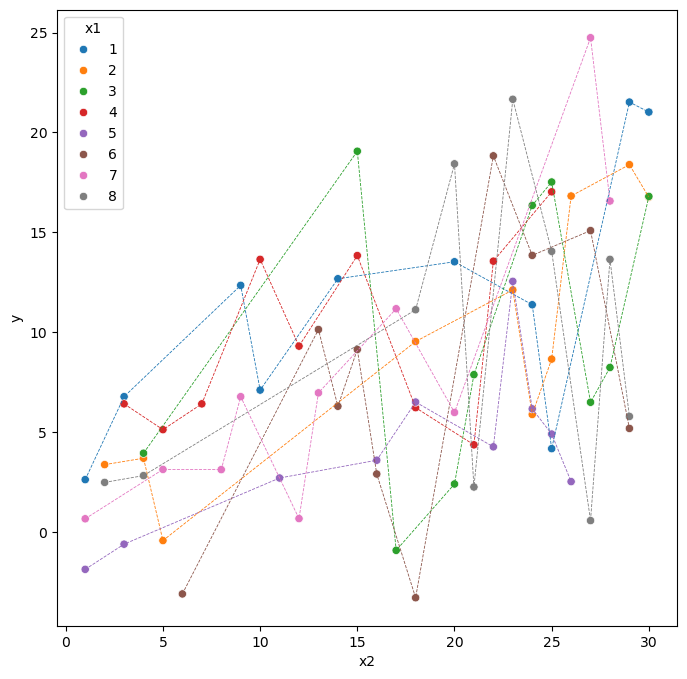

In [58]:
v(df)

In [46]:
def v2(data):
    plt.figure(figsize=(8,6), dpi=100)
    sns.boxplot(x='x1', y='y', data=data)
    plt.title('Distribution of y for each category of x1')

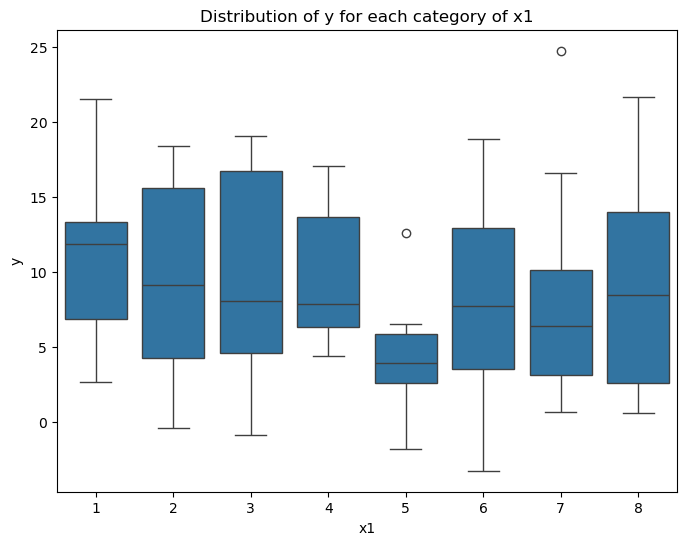

In [47]:
v2(df)

In [70]:
df.groupby('x1').mean()['y']

x1
1    11.318
2     9.484
3     9.780
4     9.596
5     4.079
6     7.508
7     7.985
8     9.287
Name: y, dtype: float64

In [71]:
df.groupby('x1').std()['y']

x1
1    6.418373
2    6.458621
3    7.132034
4    4.524821
5    4.006033
6    7.394884
7    7.637771
8    7.506411
Name: y, dtype: float64

In [50]:
def v3(data):
    plt.figure(figsize=(8,6), dpi=100)
    sns.histplot(data['y'], kde=True)

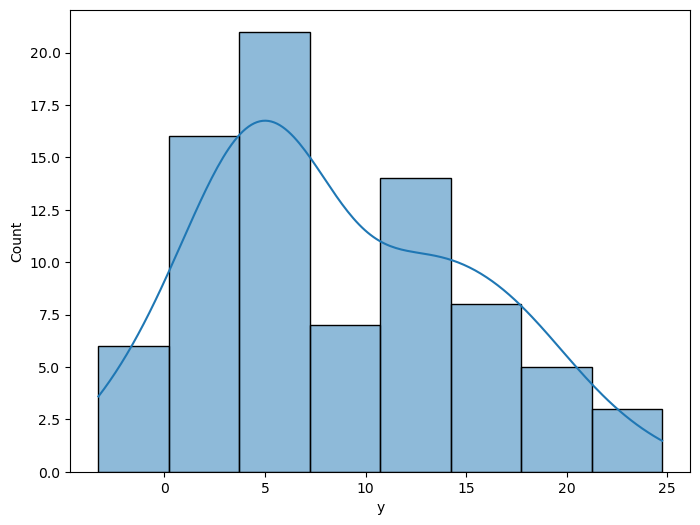

In [51]:
v3(df)

In [66]:
print(len(df[df['y'] < 0]))
print(len(df) - len(df[df['y'] < 0]))

6
74


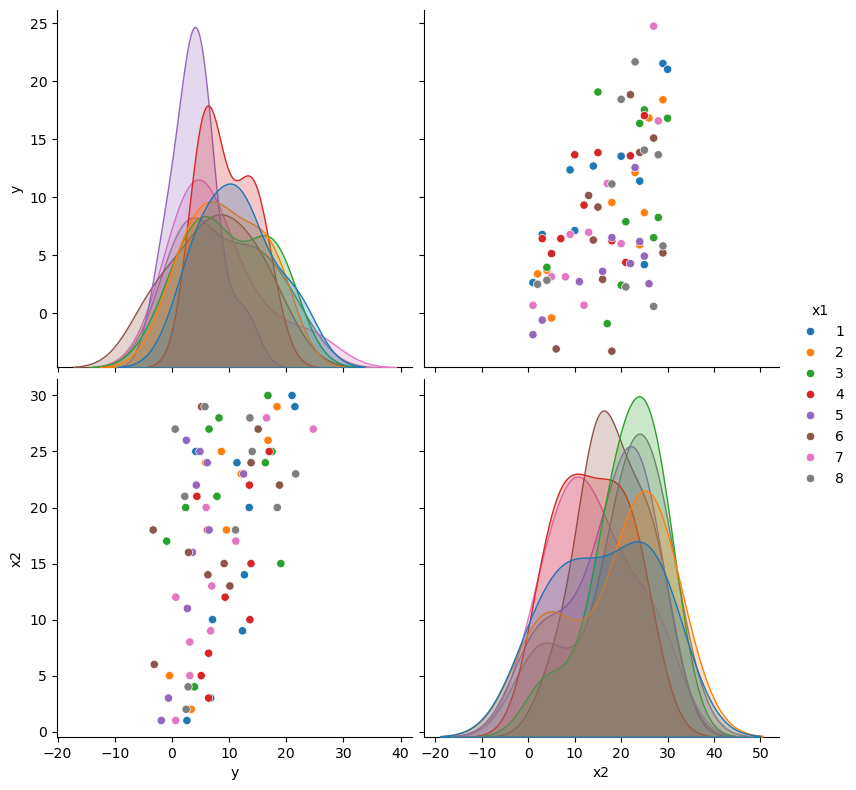

In [75]:
sns.pairplot(data=df, hue='x1', height=4);

In [89]:
def convert_df(data):
    data['x1'] = df['x1'].astype('str')
    pandas2ri.activate()
    df_r = pandas2ri.py2rpy(data)
    ro.globalenv['df_r'] = df_r

In [90]:
convert_df(df)

In [93]:
%%R
fit_1 <- lme(y ~ 1 + x2,
             data=df_r,
             random=~1|x1)

**~ 1 | x1** 
- Adds random intercepts for each level of the grouping factor 'x1'.

In [94]:
%%R
summary(fit_1)

Linear mixed-effects model fit by REML
  Data: df_r 
       AIC      BIC    logLik
  506.8283 516.2552 -249.4142

Random effects:
 Formula: ~1 | x1
        (Intercept) Residual
StdDev:    1.614479 5.286504

Fixed effects:  y ~ 1 + x2 
                Value Std.Error DF  t-value p-value
(Intercept) 1.4242935 1.4351439 71 0.992440  0.3244
x2          0.4146953 0.0677203 71 6.123651  0.0000
 Correlation: 
   (Intr)
x2 -0.82 

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.24969400 -0.73804659  0.08514176  0.60177014  2.22351064 

Number of Observations: 80
Number of Groups: 8 


In [95]:
%%R
ranef(fit_1)

  (Intercept)
1   1.4724668
2   0.1671531
3  -0.1903131
4   1.1817975
5  -2.1009855
6  -0.7464019
7   0.3643349
8  -0.1480518


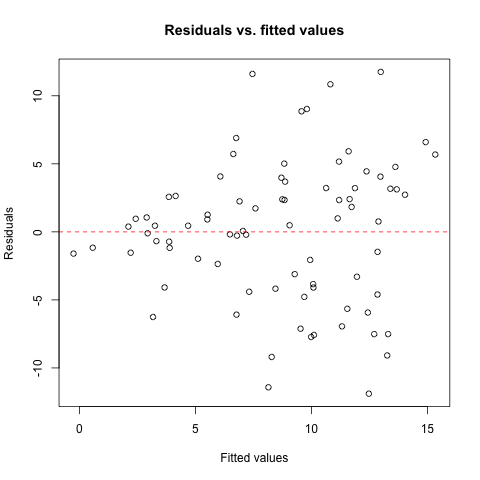

In [138]:
%%R
eps <- resid(fit_1)
fitted_vals <- fitted(fit_1)
plot(fitted_vals,
     eps,
     main='Residuals vs. fitted values',
     xlab='Fitted values',
     ylab='Residuals',
     col='black')
abline(h=0, col='red', lty=2)

- Residuals are not homoscedastic (instead, they're heteroscedastic)

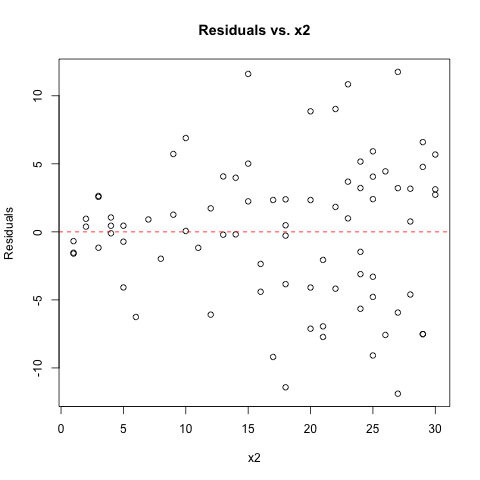

In [115]:
%%R
eps <- resid(fit_1)
plot(df_r$x2,
     eps,
     main='Residuals vs. x2',
     xlab='x2',
     ylab='Residuals',
     col='black')
abline(h=0, col='red', lty=2)

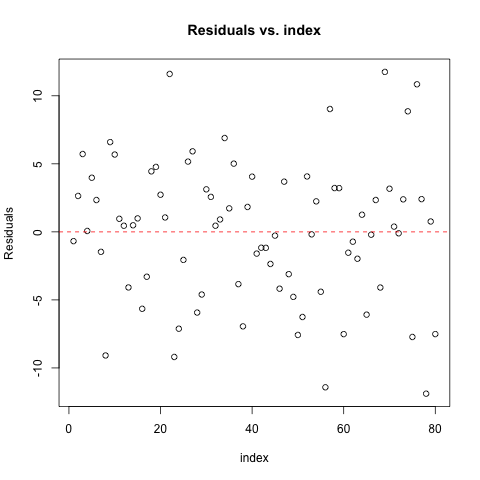

In [181]:
%%R
eps <- resid(fit_1)
plot(seq_along(eps),
     eps,
     main='Residuals vs. index',
     xlab='index',
     ylab='Residuals',
     col='black')
abline(h=0, col='red', lty=2)

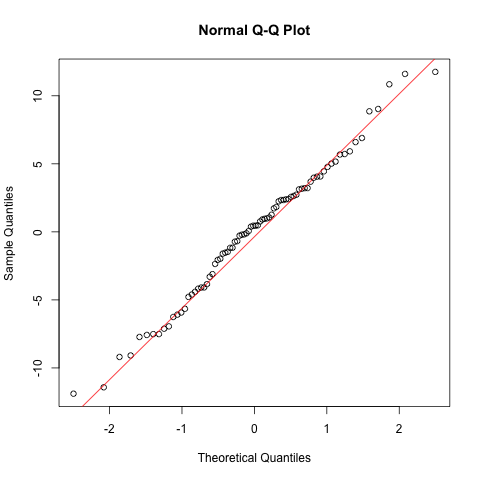

In [126]:
%%R
qqnorm(eps)
qqline(eps, col='red')

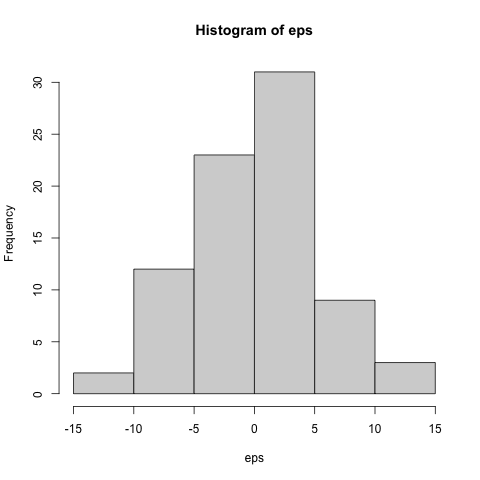

In [139]:
%%R
hist(eps)

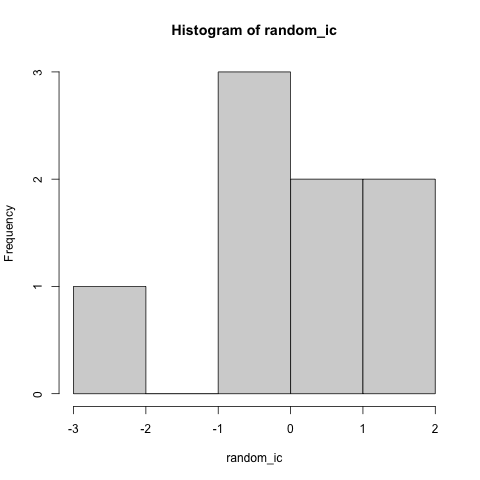

In [148]:
%%R
random_ic <- ranef(fit_1)$'(Intercept)'
hist(random_ic)

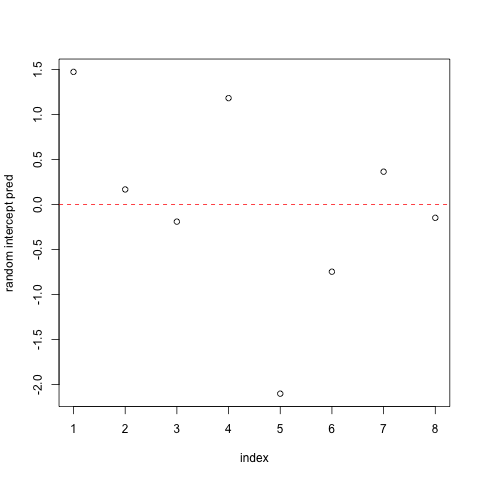

In [155]:
%%R
plot(seq_along(random_ic), random_ic, xlab='index', ylab='random intercept pred')
abline(h=0, col='red', lty=2)

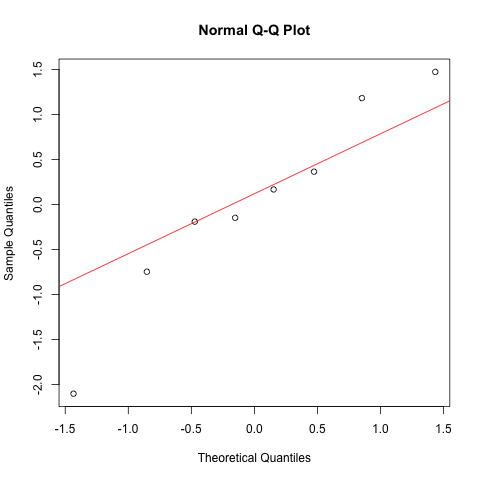

In [157]:
%%R
qqnorm(random_ic)

qqline(random_ic, col='red')

In [243]:
%%R
fit_2 <- lme(y ~ 1 + x2,
             data = df_r,
             random = ~1 | x1,
             weights = varPower(form = ~x2))
summary(fit_2)

Linear mixed-effects model fit by REML
  Data: df_r 
       AIC     BIC    logLik
  489.3115 501.095 -239.6557

Random effects:
 Formula: ~1 | x1
        (Intercept)  Residual
StdDev:    2.011775 0.9219304

Variance function:
 Structure: Power of variance covariate
 Formula: ~x2 
 Parameter estimates:
    power 
0.6024598 
Fixed effects:  y ~ 1 + x2 
                Value Std.Error DF  t-value p-value
(Intercept) 1.0489635 0.8670838 71 1.209760  0.2304
x2          0.4377782 0.0456705 71 9.585575  0.0000
 Correlation: 
   (Intr)
x2 -0.387

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-1.9970158 -0.6048313  0.1132042  0.6438412  2.3821717 

Number of Observations: 80
Number of Groups: 8 


- [VarPower](https://library.virginia.edu/data/articles/modeling-non-constant-variance)
- The varPower() function allows us to model variance as a power of the absolute value of a covariate.
- Allows one to model situations where the spread of the residuals is not constant, but rather changes systematically with a covariate ('x2' in our case).

When using VarPower, a *power* parameter is estimated, which indicates how the residual variance changes as a function of the specified covariate(s?).
- A positive value of the power parameter indicates that the residual variance increases as the specified covariate increases.
- A negative value of the power parameter indicates that the residual variance decreases as the specified covariate decreases.

In our case, since $\, \text{power} = 0.6024598, \,$ the model suggests that the residual variance grows with the rate

$$ \large|x2_{i}|^{2 \, \times \, 0.6024598}. $$

In [236]:
def test_growth(data, param):
    x2 = data['x2'].values
    vals = []
    for val in x2:
        vals.append(np.abs(val)**(2*param))
    vals = np.array(vals)
    plt.scatter(np.arange(x2.shape[0]), vals, facecolors='none', edgecolors='black');

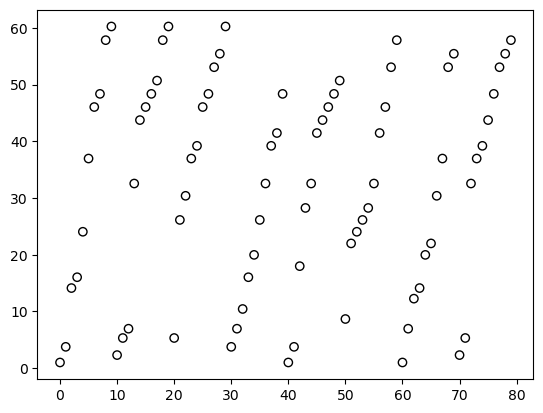

In [237]:
test_growth(df, 0.6024598)

In [238]:
df['x2'].values

array([ 1,  3,  9, 10, 14, 20, 24, 25, 29, 30,  2,  4,  5, 18, 23, 24, 25,
       26, 29, 30,  4, 15, 17, 20, 21, 24, 25, 27, 28, 30,  3,  5,  7, 10,
       12, 15, 18, 21, 22, 25,  1,  3, 11, 16, 18, 22, 23, 24, 25, 26,  6,
       13, 14, 15, 16, 18, 22, 24, 27, 29,  1,  5,  8,  9, 12, 13, 17, 20,
       27, 28,  2,  4, 18, 20, 21, 23, 25, 27, 28, 29])

In [250]:
%%R
anova(fit_1, fit_2)

      Model df      AIC      BIC    logLik   Test  L.Ratio p-value
fit_1     1  4 506.8283 516.2552 -249.4142                        
fit_2     2  5 489.3115 501.0950 -239.6557 1 vs 2 19.51686  <.0001


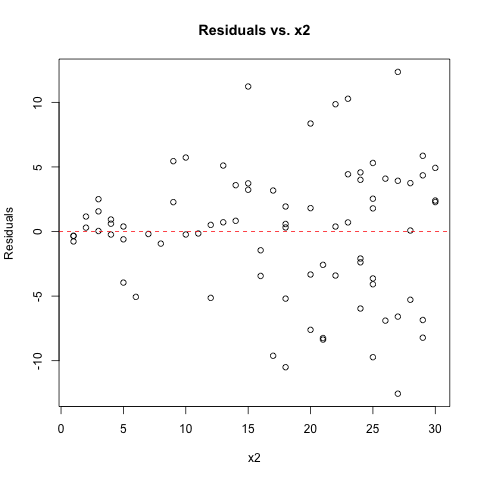

In [240]:
%%R
eps_2 <- resid(fit_2)
plot(df_r$x2,
     eps_2,
     main='Residuals vs. x2',
     xlab='x2',
     ylab='Residuals',
     col='black')
abline(h=0, col='red', lty=2)

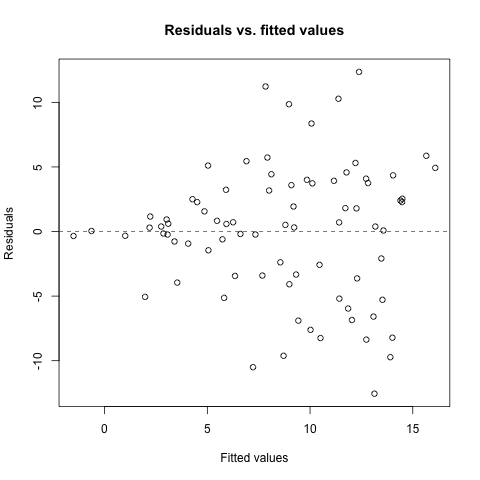

In [246]:
%%R
eps_2 <- resid(fit_2)
fitted_vals_2 <- fitted(fit_2)
plot(fitted_vals_2,
     eps_2,
     main='Residuals vs. fitted values',
     xlab='Fitted values',
     ylab='Residuals',
     col='black')
abline(h=0, col='red', lty=2)

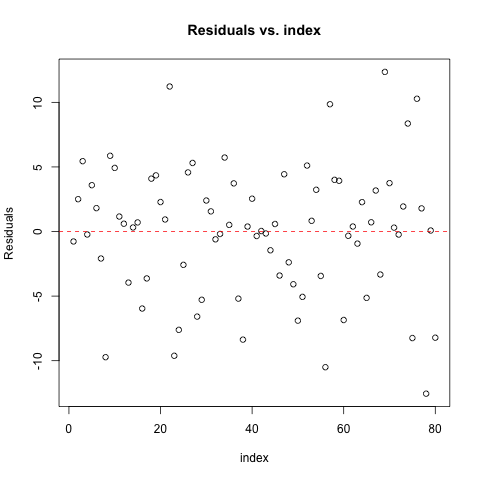

In [247]:
%%R
plot(seq_along(eps_2),
     eps_2,
     main='Residuals vs. index',
     xlab='index',
     ylab='Residuals',
     col='black')
abline(h=0, col='red', lty=2)

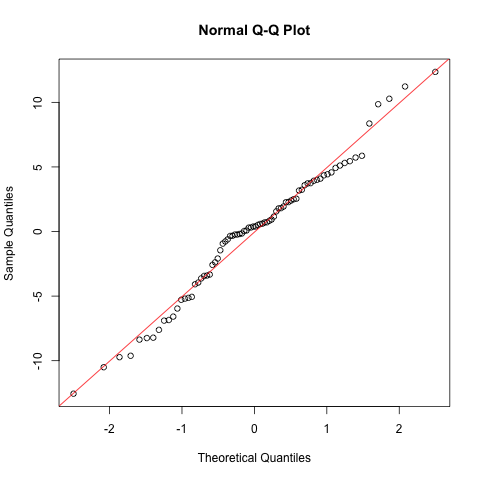

In [248]:
%%R
qqnorm(eps_2)
qqline(eps_2, col='red')

<br>

<h3>Task 5</h3>

In [149]:
def generate_series(n, sigma2, rho, beta, mu, return_df=False, mark=False):
    exp_mat = np.abs(np.arange(n)[:, np.newaxis] - np.arange(n)[np.newaxis, :])
    Sigma = sigma2 * (rho[0]**exp_mat)
    time = np.arange(1, n+1)
    mean = np.repeat(mu, n) + beta * time
    y = multivariate_normal.rvs(mean=mean, cov=Sigma, size=1)
    my_data = pd.DataFrame({
        'time': time,
        'y': y
    })
    
    plot_series(my_data, mark)
    
    if return_df:
        return my_data

In [150]:
def plot_series(data, mark=False):
    sns.set_style('darkgrid')
    plt.figure(figsize=(8,6), dpi=100)
    if mark:
        plt.plot(data['time'], data['y'], color='black', marker='o', linestyle='-', zorder=2)
    else:
        plt.plot(data['time'], data['y'], color='black', linestyle='-', zorder=2)
    plt.xlabel('Time', size=12)
    plt.ylabel('Value (y)', size=12)
    plt.grid(True, zorder=1, alpha=0.8)

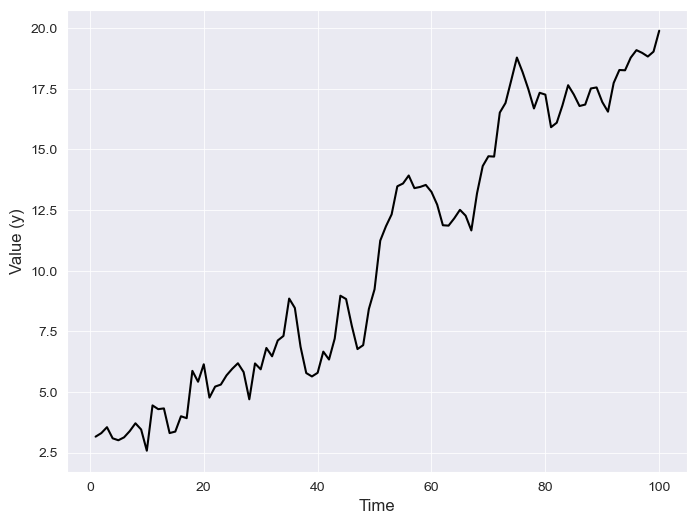

In [154]:
my_data = generate_series(n=100, sigma2=4, rho=[0.95], beta=0.2, mu=-1, return_df=True)

$\boldsymbol{\mu}$:
- Toimii baselinenä jokaiselle ajanhetkelle $\, y_i \,$

$\boldsymbol{\beta}$:

- Ajan fixed effect. 
- Kun aika muuttuu yhden yksikön (päivä?), niin vastemuuttujan arvo muuttuu $\beta$:n verran.

$\boldsymbol{\rho}$:
- Autokorrelaatioparametri? 
- $\rho \in [-1, 1]$.
- 'exp_mat' kuvastaa ajanhetkien välisiä eroja. 
- $\rho$ määrittää, kuinka vahvasti eri ajanhetkien arvot korreloivat keskenään

$\boldsymbol{\sigma}^2$:
- Kertoo, kuinka suuri vaihtelu aikasarjassa on.

In [128]:
def esimerkki_1(n, rho):
    exp_mat = np.abs(np.arange(n)[:, np.newaxis] - np.arange(n)[np.newaxis, :])
    return rho**exp_mat

In [129]:
esimerkki_1(5, 0.9)

array([[1.    , 0.9   , 0.81  , 0.729 , 0.6561],
       [0.9   , 1.    , 0.9   , 0.81  , 0.729 ],
       [0.81  , 0.9   , 1.    , 0.9   , 0.81  ],
       [0.729 , 0.81  , 0.9   , 1.    , 0.9   ],
       [0.6561, 0.729 , 0.81  , 0.9   , 1.    ]])

In [130]:
esimerkki_1(5, 0.7)

array([[1.    , 0.7   , 0.49  , 0.343 , 0.2401],
       [0.7   , 1.    , 0.7   , 0.49  , 0.343 ],
       [0.49  , 0.7   , 1.    , 0.7   , 0.49  ],
       [0.343 , 0.49  , 0.7   , 1.    , 0.7   ],
       [0.2401, 0.343 , 0.49  , 0.7   , 1.    ]])

In [131]:
esimerkki_1(5, 0.4)

array([[1.    , 0.4   , 0.16  , 0.064 , 0.0256],
       [0.4   , 1.    , 0.4   , 0.16  , 0.064 ],
       [0.16  , 0.4   , 1.    , 0.4   , 0.16  ],
       [0.064 , 0.16  , 0.4   , 1.    , 0.4   ],
       [0.0256, 0.064 , 0.16  , 0.4   , 1.    ]])

In [132]:
esimerkki_1(5, -0.7)

array([[ 1.    , -0.7   ,  0.49  , -0.343 ,  0.2401],
       [-0.7   ,  1.    , -0.7   ,  0.49  , -0.343 ],
       [ 0.49  , -0.7   ,  1.    , -0.7   ,  0.49  ],
       [-0.343 ,  0.49  , -0.7   ,  1.    , -0.7   ],
       [ 0.2401, -0.343 ,  0.49  , -0.7   ,  1.    ]])

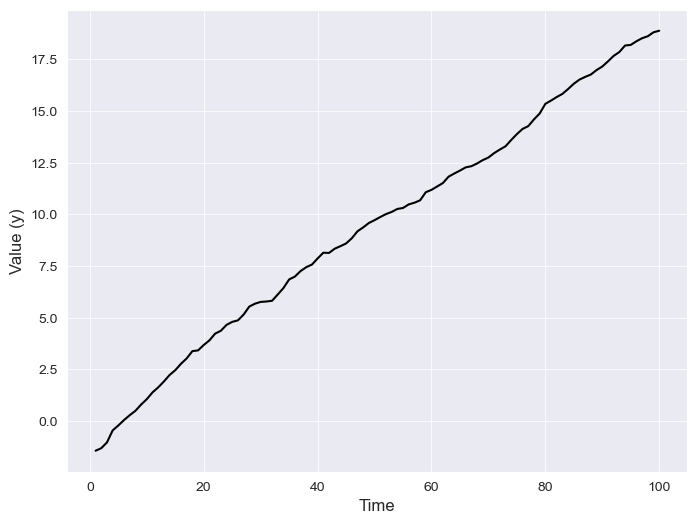

In [155]:
generate_series(n=100, 
                sigma2=0.1, 
                rho=[0.95], 
                beta=0.2, 
                mu=-1, 
                return_df=False)

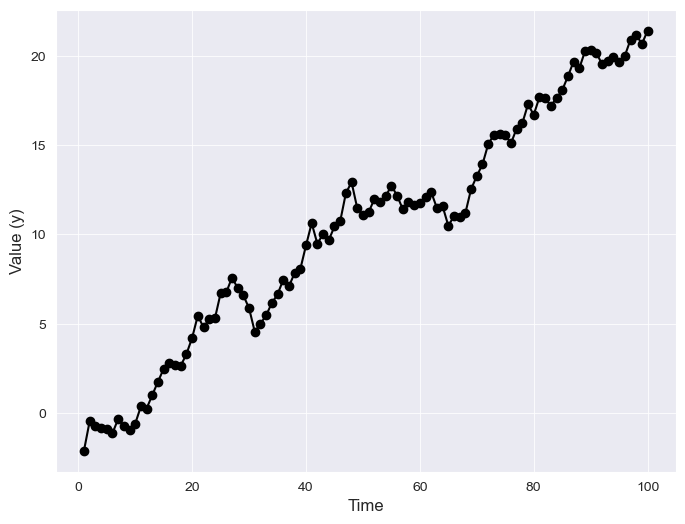

In [157]:
generate_series(n=100, 
                sigma2=4, 
                rho=[0.95], 
                beta=0.2, 
                mu=-1, 
                return_df=False,
                mark=True)

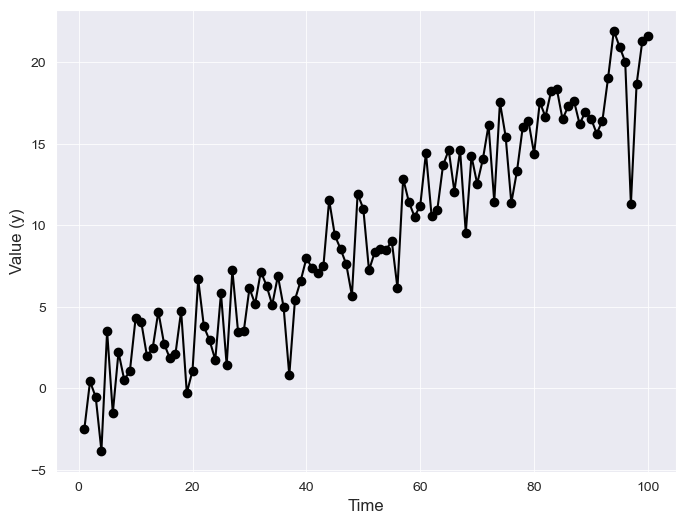

In [161]:
generate_series(n=100, 
                sigma2=4, 
                rho=[0.1], 
                beta=0.2, 
                mu=-1, 
                return_df=False,
                mark=True)

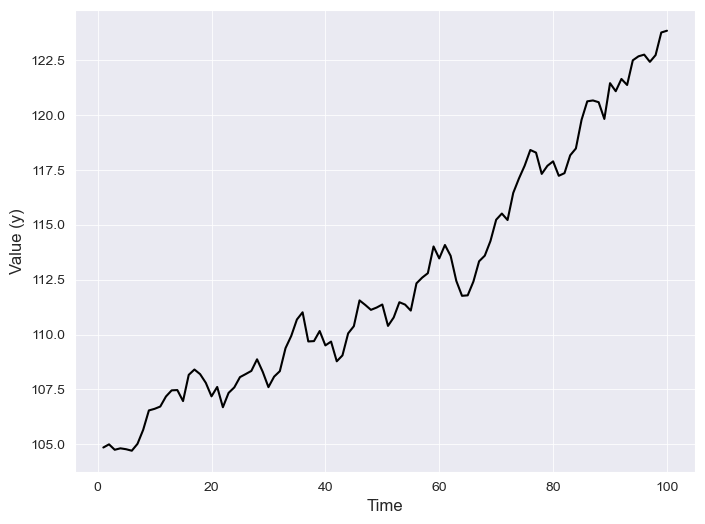

In [167]:
generate_series(n=100, 
                sigma2=4, 
                rho=[0.95], 
                beta=0.2, 
                mu=100, 
                return_df=False,
                mark=False)

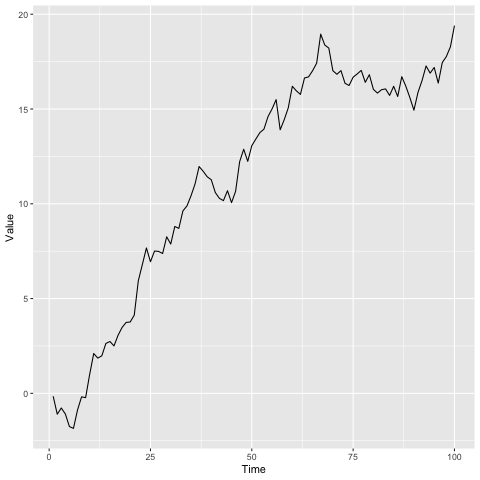

In [12]:
%%R
# Parametrit
mu <- -1 
beta <- 0.2 
rho <- 0.95 
sigma2 <- 4

 # Sarjan pituus
n <- 100

# Sarjan generointi
exp_mat <- abs(matrix(0:(n - 1), n, n, byrow = TRUE) - matrix(0:(n - 1), n, n, byrow = FALSE))
Sigma <- sigma2*(rho[1]^exp_mat)
my_data_r <- data.frame(time = 1:n,
                        y = mvrnorm(1, mu = rep(mu, n) + beta*(1:n), Sigma = Sigma))

# Kuva sarjasta
ggplot(my_data_r, aes(x = time, y = y)) + geom_line() +
labs(x = "Time", y = "Value")

In [48]:
%%R

# Parametrit
mu <- -1 
beta <- 0.2 
rho <- 0.95 
sigma2 <- 4

 # Sarjan pituus
n <- 100

n_iter <- 10
mat <- matrix(NA, nrow = n_iter, ncol = 12)
exp_mat <- abs(matrix(0:(n - 1), n, n, byrow = TRUE) - matrix(0:(n - 1), n, n, byrow = FALSE))

for (i in 1:n_iter) {
    
    # Generate series
    Sigma <- sigma2*(rho[1]^exp_mat)
    my_data_r <- data.frame(time = 1:n,
                            y = mvrnorm(1, mu = rep(mu, n) + beta*(1:n), Sigma = Sigma))
    
    # Fit the model
    fit_ts <- gls(y ~ time, 
              data = my_data_r, 
              correlation = corAR1(form = ~ time))
    
    # Extract the CI
    ci <- intervals(fit_ts)
    
    # Save the results
    mat[i,] <- c(
        ci$coef['(Intercept)',],
        ci$coef['time',],
        ci$corStruct['Phi',],
        ci$sigma
    )
}

# Assign column names for clarity
colnames(mat) <- c('IC_lower', 'IC_est', 'IC_upper',
                   'time_lower','time_est', 'time_upper',
                   'phi_lower', 'phi_est', 'phi_upper',
                   'sigma_lower', 'sigma_est', 'sigma_upper')

mean_intervals <- colMeans(mat)
mean_intervals

   IC_lower      IC_est    IC_upper  time_lower    time_est  time_upper 
 -4.1789145  -1.0214825   2.1359496   0.1606741   0.2096963   0.2587185 
  phi_lower     phi_est   phi_upper sigma_lower   sigma_est sigma_upper 
  0.5532946   0.9355387   0.9864916   0.6483449   1.8832648   6.6582821 
